In [2]:
import numpy as np
import os
import cv2 as cv
# from scipy.misc import imread, imresize
# imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. 
# Use imageio.imread instead.
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
print ("PACKAGES LOADED")

PACKAGES LOADED


In [3]:
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

Current folder is C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers


In [4]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

In [11]:
img = cv.imread("./img/cat.jpg")
#print_typeshape(cat)

b, g, r = cv.split(img)   # img파일을 b,g,r로 분리
cat = cv.merge([r,g,b]) # b, r을 바꿔서 Merge

In [12]:
img.shape

(1600, 2400, 3)

In [13]:
cwd

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers'

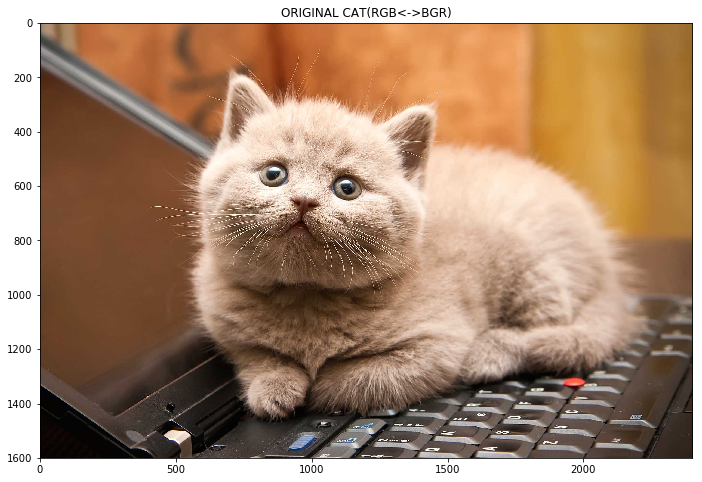

In [5]:
plt.figure(figsize=(12,8))
plt.imshow(cat)
plt.title("ORIGINAL CAT(RGB<->BGR)")
plt.draw()

Type is <class 'numpy.ndarray'>
Shape is (1600, 2400, 3)


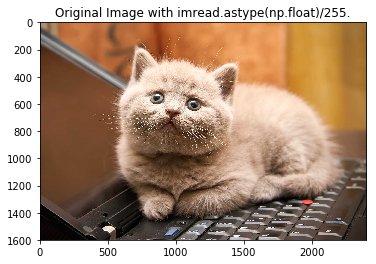

In [6]:
# LOAD
img3 = cv.imread("./img/cat.jpg").astype(np.float)

b, g, r = cv.split(img)   # img파일을 b,g,r로 분리
cat3 = cv.merge([r,g,b]) # b, r을 바꿔서 Merge

print_typeshape(cat3)


# PLOT
plt.figure(0)
# 자료형이 안맞는 문제 때문에
# 255로 나누어야 제대로된 색이 나온다.
plt.imshow(cat3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


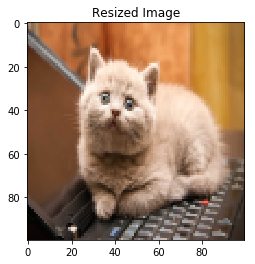

In [7]:
# 행 : Height, 열:width
height, width = cat3.shape[:2]

# RESIZE
# Manual Size지정
#r = 100.0/cat3.shape[1]
#dim = (100, int(cat3.shape[0]*r))
catsmall = cv.resize(cat3, (100,100), interpolation=cv.INTER_AREA)
print_typeshape(catsmall)
# PLOT
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

# 참고
# http://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html

In [8]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb

In [9]:
catsmallgray = rgb2gray(catsmall)
print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


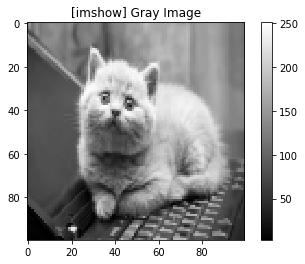

In [10]:
# OpenCV로 GrayScale을 할 수 있지만
# 해당 강의는 OpenCV를 쓰지 않기 때문에 직접 행렬 변환을 해주었음.

plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

In [11]:
# Reshape

# MATRIX TO VECTOR
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# VECTOR TO MATRIX
catmatrix = np.reshape(catrowvec, (100, -1));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>
size of catmatrix is (100, 100)
type of catmatrix is <class 'numpy.ndarray'>


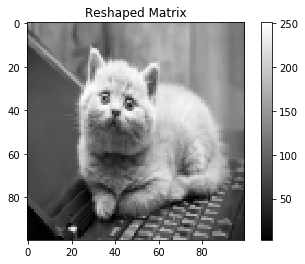

In [12]:
plt.imshow(catmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

In [13]:
# 해당 폴더에 있는 이미지들을 가져오기

cwd   = os.getcwd()
path  = cwd + "/img/"
flist = os.listdir(path)
print ("[%d] FILE ARE IN [%s]" % (len(flist), path))

[4] FILE ARE IN [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers/img/]


In [14]:
for i, f in enumerate(flist):
    print ("[%d]TH FILE IS [%s]" % (i, f))

[0]TH FILE IS [cat.jpg]
[1]TH FILE IS [cow.jpg]
[2]TH FILE IS [dog.jpg]
[3]TH FILE IS [horse.jpeg]


In [15]:
# 폴더 안에 있는 파일들 중에 아래 확장자를 가진 이미지만 가져오겠다는 선언
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    # LOAD AND APPEND TO IMGS LIST
    fullpath = os.path.join(path,f)
    imgs.append(imageio.imread(fullpath))
    
    # APPEND NAMES
    names.append(os.path.splitext(f)[0])

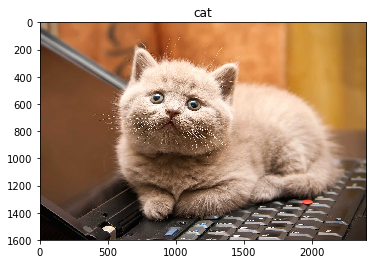

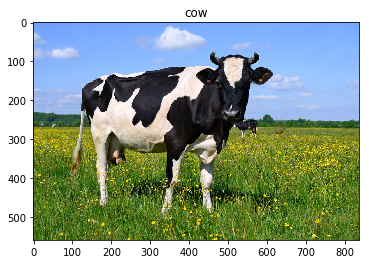

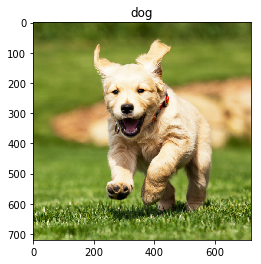

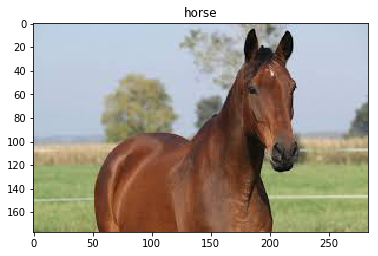

In [16]:
# Scipy 1.2.0부터 imread 라이브러리가 삭제됨에 따라
# imageio 모듈을 사용하였음.
# OpenCV의 경우 imread를 할 경우 RGB가 BGR로 바뀌므로
# 다중 행렬의 색상 변환이 어려움이 있었음.

#b, g, r = cv.split(imgs) # img파일을 b,g,r로 분리
#imgs = cv.merge([r,g,b])  # b, r을 바꿔서 Merge

for img, name in zip(imgs, names):    
    plt.imshow(img)
    plt.title(name)
    plt.show()